<a href="https://colab.research.google.com/github/vvrgit/Aquaculture/blob/main/Aquaculture_Data_Preprocessing_Fish_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/realfishdataset.csv")
data.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,katla
1,7.6,28.0,5.9,sing
2,7.8,27.0,5.5,sing
3,6.5,31.0,5.5,katla
4,8.2,27.0,8.5,prawn


In [3]:
stats=data.describe()
file_name = 'realtimefish.xlsx'
stats.to_excel(file_name)

<Axes: >

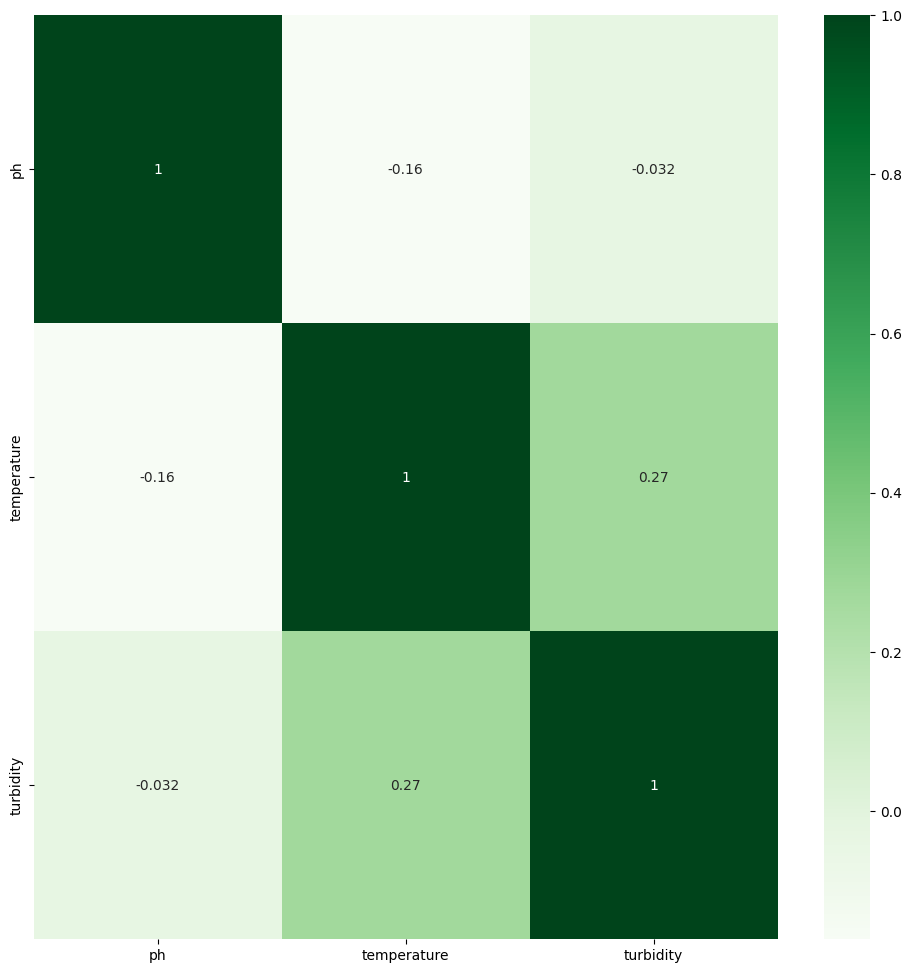

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
data1=data
data.pop("fish")
matrix = data.corr()

# plotting correlation matrix
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix, cmap="Greens", annot=True)

In [ ]:
data=pd.read_excel("/content/AWD - Copy.xlsx")
data.head()

,Plankton (No. L-1)
0,6069.624017
1,250.995959
2,7218.927473
3,1230.062252
4,1035.054820


<Axes: >

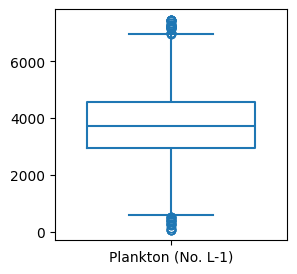

In [ ]:
f, ax = plt.subplots(figsize=(3,3))
sns.boxplot(data=data,fill=False, gap=.1)

In [9]:
data.isnull().sum()

,0
ph,0
temperature,0
turbidity,0


<Axes: >

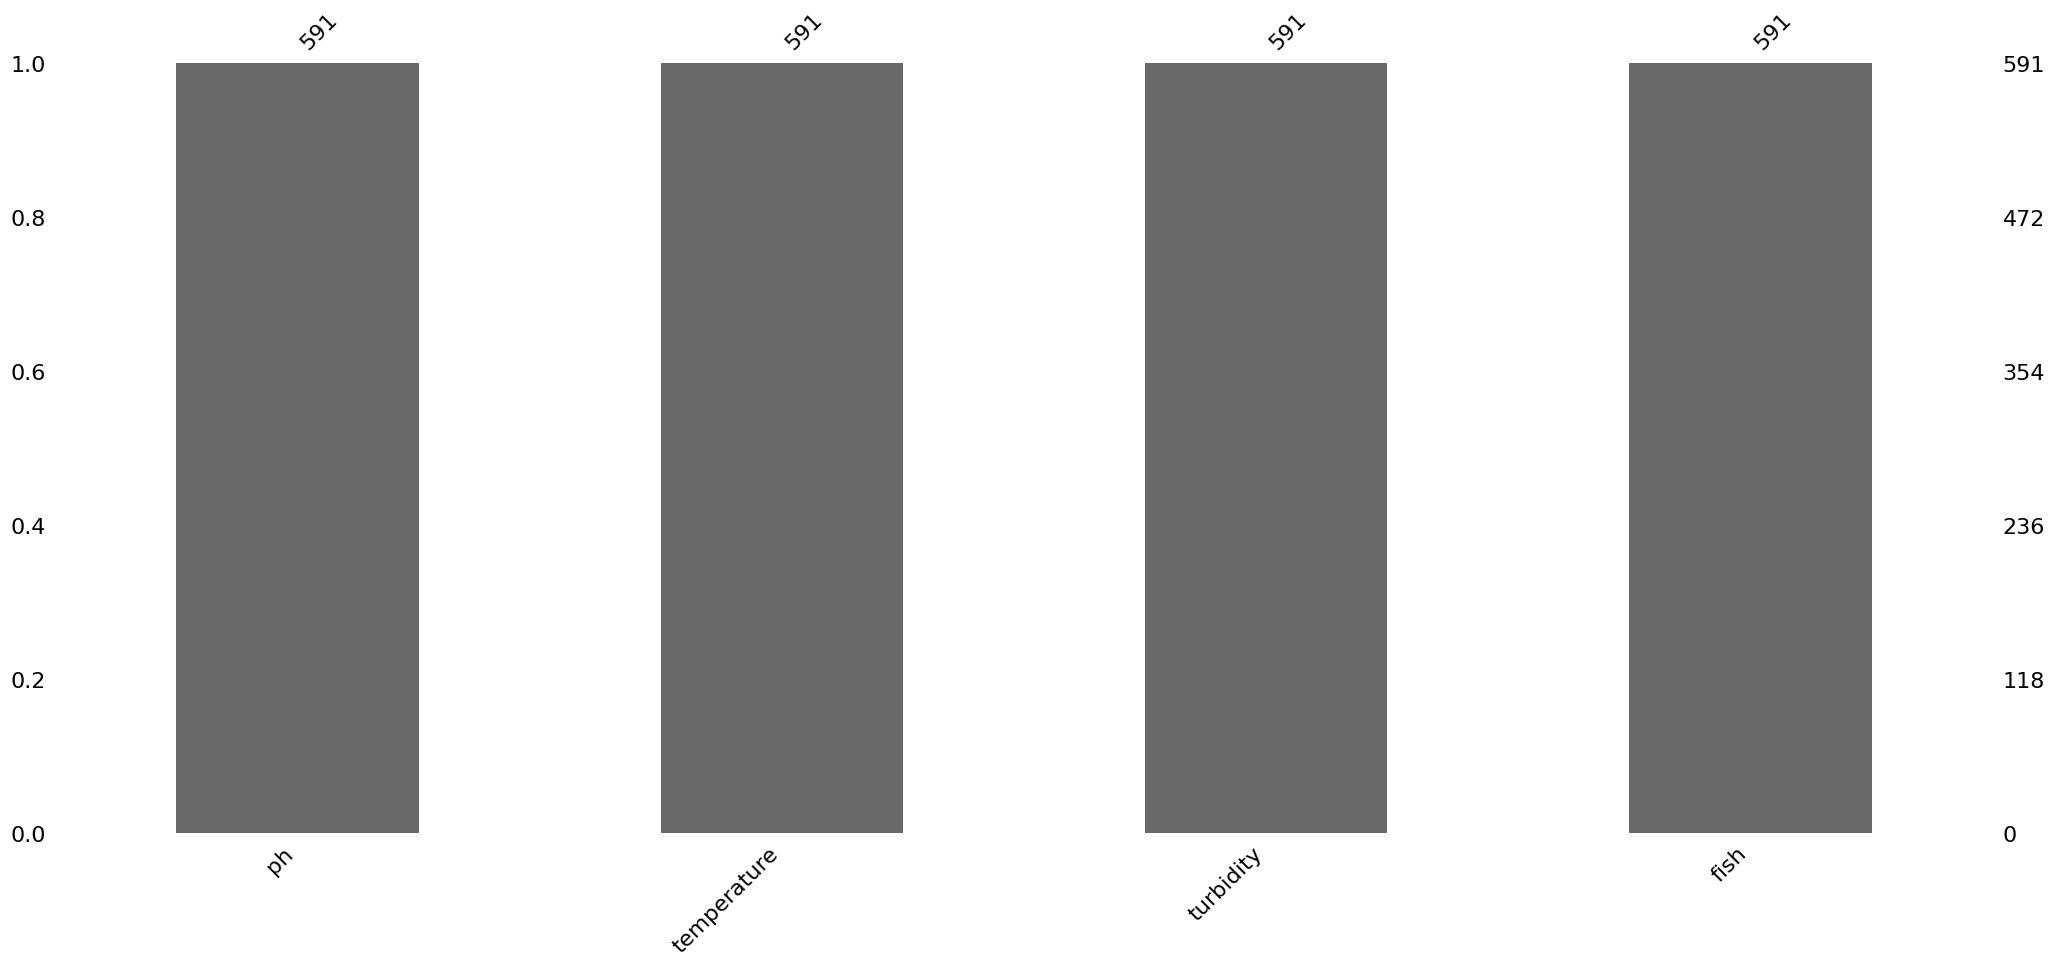

In [10]:
# Program to visualize missing values in dataset
# Importing the libraries
import pandas as pd
import missingno as msno

# Loading the dataset
df = pd.read_csv("/content/realfishdataset.csv")

# Visualize the number of missing
# values as a bar chart
msno.bar(df)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

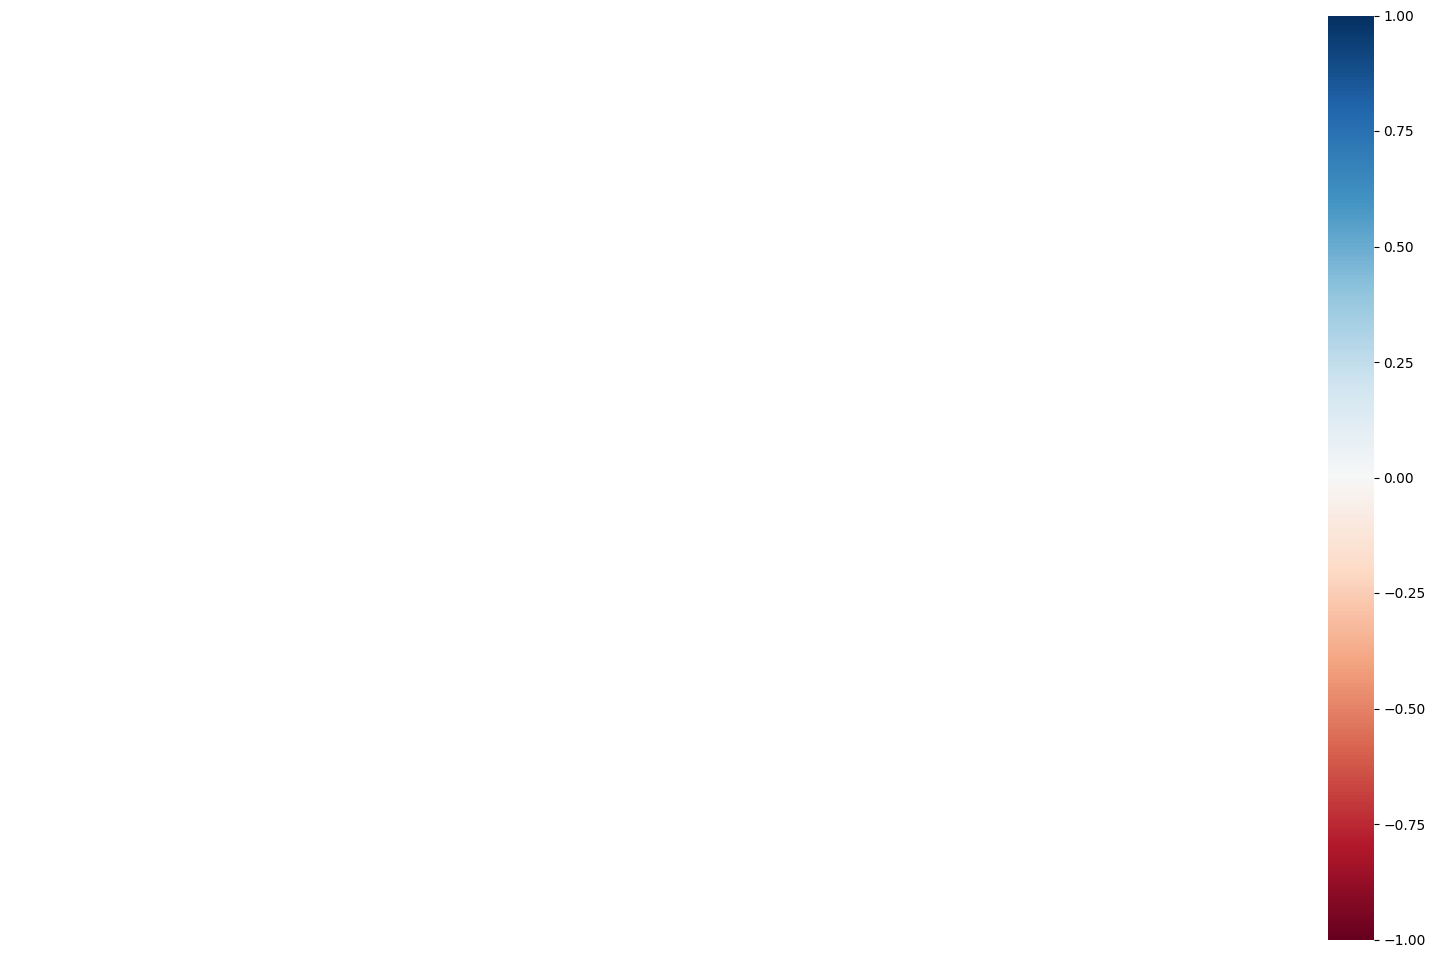

In [40]:
# Program to visualize missing values in dataset

# Importing the libraries
import pandas as pd
import missingno as msno

# Loading the dataset
df = pd.read_csv("/content/realfishdataset.csv")


# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df)

In [41]:
df.describe()

,ph,temperature,turbidity
count,591.000000,591.000000,591.000000
mean,7.532115,21.789306,4.432944
std,0.810588,4.536612,2.169062
min,5.500000,4.000000,1.000000
25%,6.990000,17.940000,3.480000
50%,7.500000,21.060000,3.570000
75%,8.200000,24.000000,4.005000
max,9.000000,35.000000,15.800000


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

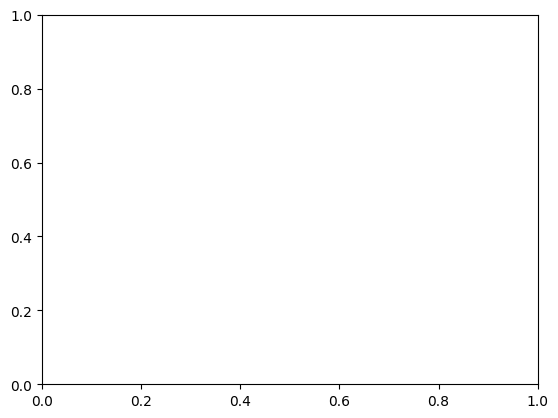

In [43]:
# Creating plot
plt.boxplot(df)
# show plot
plt.show()

In [38]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        #print(i)
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [39]:
import numpy as np
sample_outliers_pH = detect_outliers_zscore(data1['ph'])
print("Outliers in pH column from Z-scores method: ", sample_outliers_pH)
sample_outliers_temp = detect_outliers_zscore(data1['temperature'])
print("Outliers in temperature column from Z-scores method: ", sample_outliers_temp)
sample_outliers_turb = detect_outliers_zscore(data1['turbidity'])
print("Outliers in turbidity column from Z-scores method: ", sample_outliers_turb)

Outliers in pH column from Z-scores method:  []
Outliers in temperature column from Z-scores method:  [5.0, 7.0, 8.0, 4.0, 6.0]
Outliers in turbidity column from Z-scores method:  [14.5, 14.6, 14.7, 14.8, 14.9, 15.1, 15.2, 15.0, 15.3, 15.4, 15.5, 15.7, 15.8, 15.19]


In [23]:
from scipy.stats import zscore
zph = np.abs(zscore(data1['ph']))
ztemp = np.abs(zscore(data1['temperature']))
zturb = np.abs(zscore(data1['turbidity']))
print(zph)

0      1.891730
1      0.083819
2      0.330762
3      1.274371
4      0.824650
         ...   
586    0.570582
587    0.669359
588    0.817525
589    1.052122
590    0.718748
Name: ph, Length: 591, dtype: float64


In [24]:
data1['zph'] = zph
data1['ztemp'] = ztemp
data1['zturb'] = zturb

In [26]:
data1.head()

,ph,temperature,turbidity,zph,ztemp,zturb
0,6.0,27.0,4.0,1.891730,1.149560,0.199769
1,7.6,28.0,5.9,0.083819,1.370176,0.676928
2,7.8,27.0,5.5,0.330762,1.149560,0.492360
3,6.5,31.0,5.5,1.274371,2.032022,0.492360
4,8.2,27.0,8.5,0.824650,1.149560,1.876618


In [27]:
outliers_ph=len(data1[data1['zph']>3])
outliers_temp=len(data1[data1['ztemp']>3])
outliers_turb=len(data1[data1['zturb']>3])

In [28]:
print("outliers in ph",outliers_ph)
print("outliers in temp",outliers_temp)
print("outliers in turb",outliers_turb)

outliers in ph 0
outliers in temp 5
outliers in turb 14


In [29]:
data1_z = data1[data1['zph']<3]
data1_z = data1[data1['ztemp']<3]
data1_z = data1[data1['zturb']<3]

In [30]:
data2=data1_z.drop(['zph', 'ztemp', 'zturb'], axis=1)
data2

,ph,temperature,turbidity
0,6.00,27.00,4.00
1,7.60,28.00,5.90
2,7.80,27.00,5.50
3,6.50,31.00,5.50
4,8.20,27.00,8.50
...,...,...,...
586,7.07,21.12,3.57
587,6.99,21.19,3.56
588,6.87,21.00,3.56
589,6.68,21.19,3.58


In [31]:
import numpy as np
sample_outliers_pH = detect_outliers_zscore(data2['ph'])
print("Outliers in pH column from Z-scores method: ", sample_outliers_pH)
sample_outliers_temp = detect_outliers_zscore(data2['temperature'])
print("Outliers in temperature column from Z-scores method: ", sample_outliers_temp)
sample_outliers_turb = detect_outliers_zscore(data2['turbidity'])
print("Outliers in turbidity column from Z-scores method: ", sample_outliers_turb)

Outliers in pH column from Z-scores method:  []
Outliers in temperature column from Z-scores method:  [5.0, 7.0, 8.0, 4.0, 6.0]
Outliers in turbidity column from Z-scores method:  [8.5, 8.5, 9.0, 10.0, 8.5, 9.5, 9.2, 9.3, 8.4, 9.4, 9.3, 9.3, 9.3, 8.7, 8.6, 8.4]


In [37]:
data1['zph'].min()

0.009735677987575814

In [ ]:
.